# **MULTIPLE LINEAR REGRESSION**

In [ ]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [ ]:
# Loading Dataset

df = pd.read_csv('ToyotaCorolla - MLR.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


# **Basic Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [ ]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
df.shape

(1436, 11)

**1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.**
# **Basic statistics**

In [ ]:
# Summary statistics
summary = df.describe().T

# Add additional measures
summary['median'] = df.median()
summary['mode'] = df.mode().iloc[0]
summary['var'] = df.var()
summary['skew'] = df.skew()
summary['kurtosis'] = df.kurt()

summary


,count,mean,std,min,25%,50%,75%,max,median,mode,var,skew,kurtosis
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.00,32500.0,9900.0,8950,1.315487e+07,1.703885,3.737781
Age_08_04,1436.0,55.947075,18.599988,1.0,44.0,61.0,70.00,80.0,61.0,68,3.459596e+02,-0.826702,-0.076632
KM,1436.0,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0,63389.5,36000,1.406734e+09,1.015912,1.685057
HP,1436.0,101.502089,14.981080,69.0,90.0,110.0,110.00,192.0,110.0,110,2.244327e+02,0.955836,8.836434
Automatic,1436.0,0.055710,0.229441,0.0,0.0,0.0,0.00,1.0,0.0,0,5.264333e-02,3.878197,13.058597
cc,1436.0,1576.855850,424.386770,1300.0,1400.0,1600.0,1600.00,16000.0,1600.0,1600,1.801041e+05,27.431793,930.711227
Doors,1436.0,4.033426,0.952677,2.0,3.0,4.0,5.00,5.0,4.0,5,9.075927e-01,-0.076395,-1.874765
Cylinders,1436.0,4.000000,0.000000,4.0,4.0,4.0,4.00,4.0,4.0,4,0.000000e+00,0.000000,0.000000
Gears,1436.0,5.026462,0.188510,3.0,5.0,5.0,5.00,6.0,5.0,5,3.553619e-02,2.283960,37.703476
Weight,1436.0,1072.459610,52.641120,1000.0,1040.0,1070.0,1085.00,1615.0,1070.0,1075,2.771088e+03,3.108639,19.362901


# **Checking for missing values**

In [ ]:
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


# **Checking for any invalid datatypes**

In [ ]:
df.dtypes

,0
Price,int64
Age_08_04,int64
KM,int64
Fuel_Type,object
HP,int64
Automatic,int64
cc,int64
Doors,int64
Cylinders,int64
Gears,int64


In [ ]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

# **Handle Categorical Variables**

In [ ]:
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)
df.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False


# **Data Visualizations**

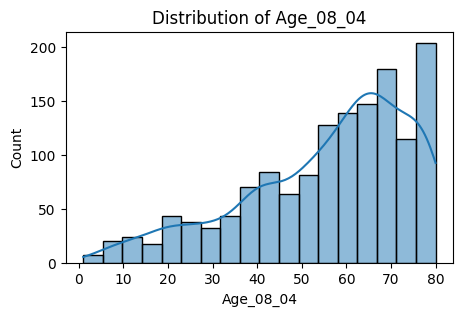

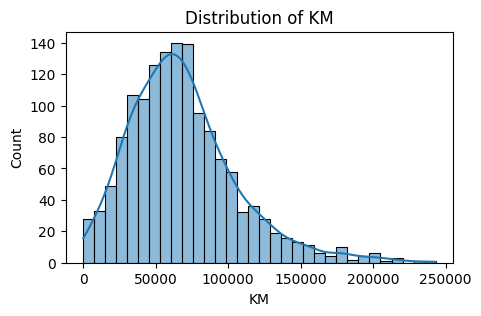

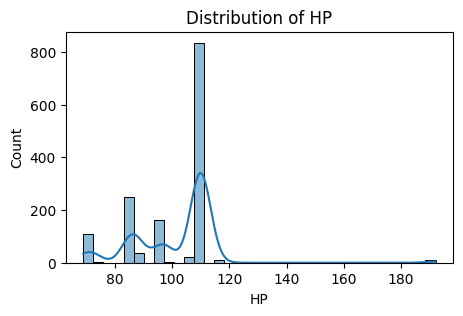

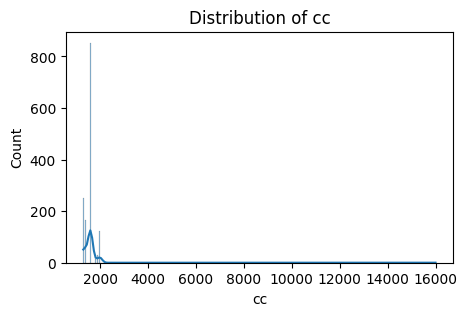

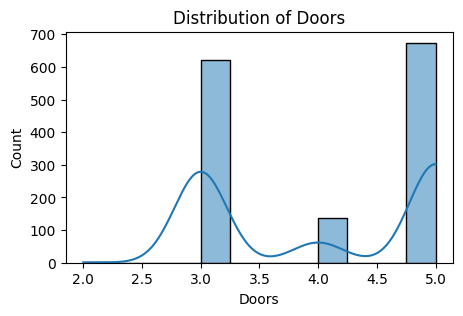

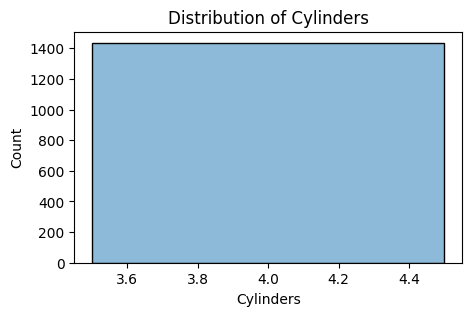

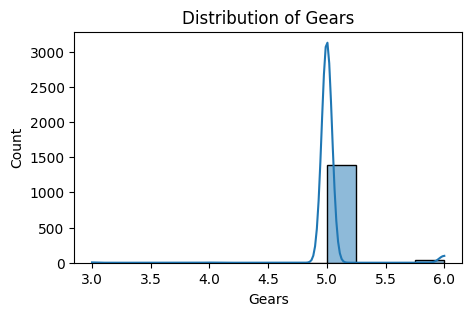

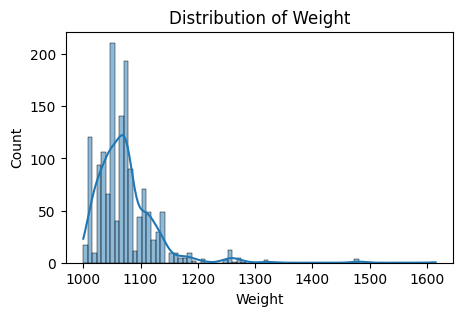

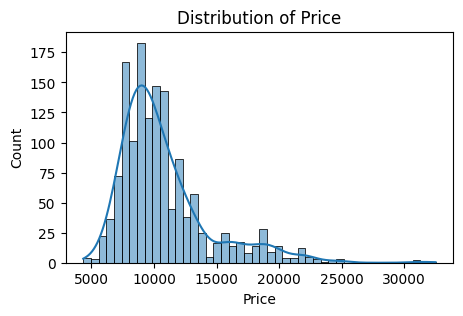

In [ ]:
# Distribution plots

num_cols = ['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight', 'Price']

for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# **Outlier Detection (Boxplots)**

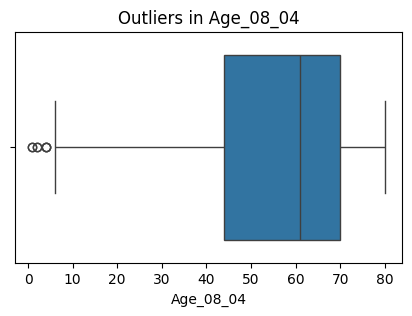

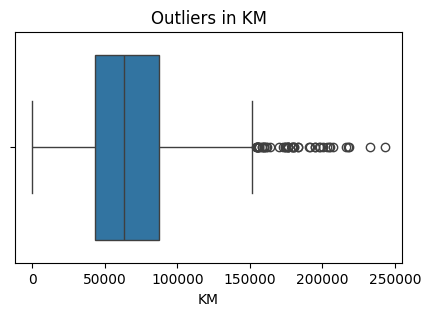

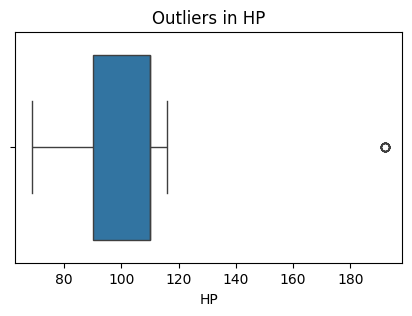

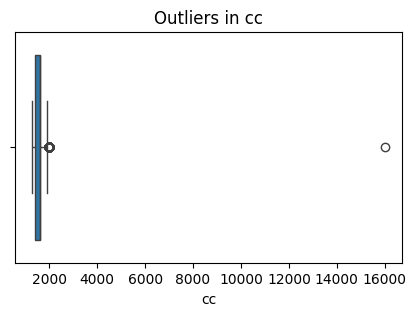

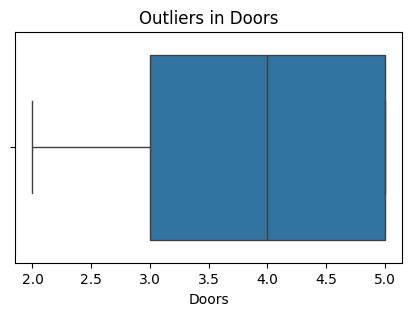

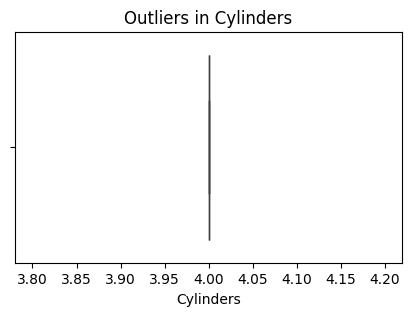

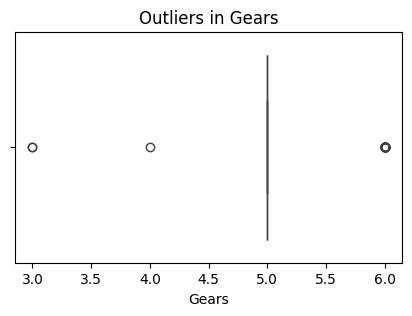

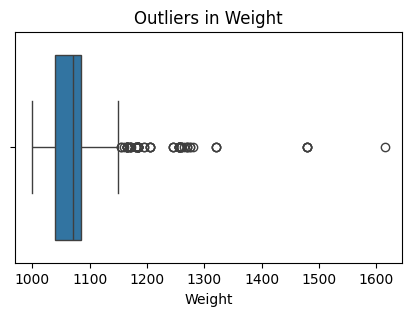

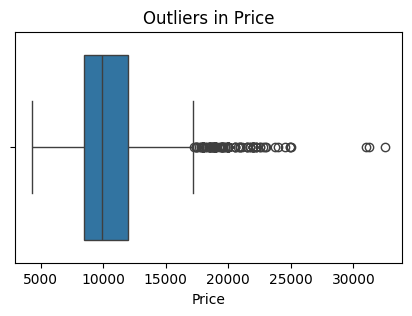

In [ ]:
for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f'Outliers in {col}')
    plt.show()


# **Correlation Analysis**

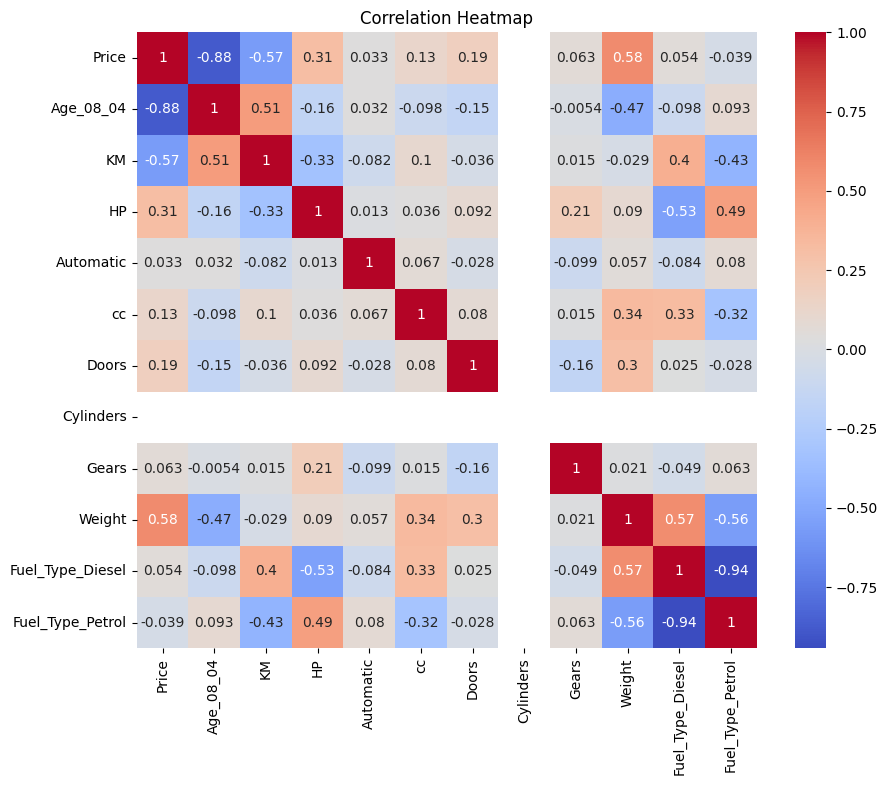

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# **Relationship(Scatter Plots)**

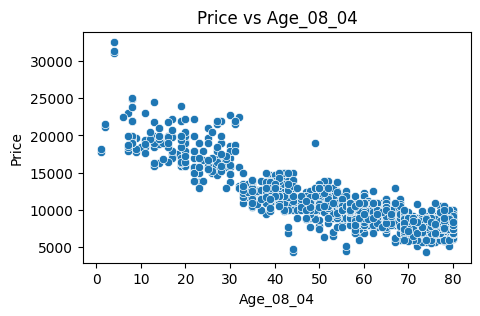

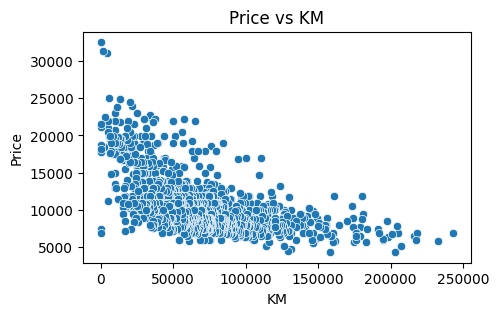

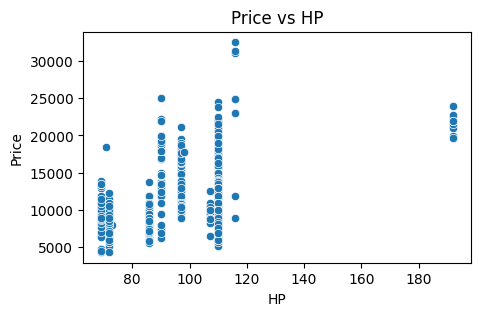

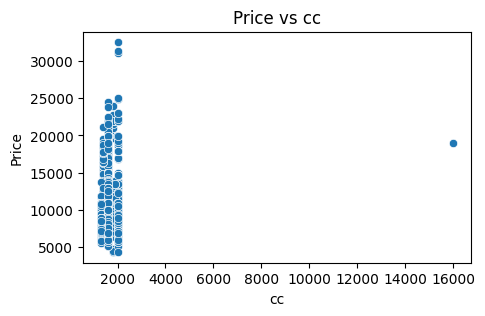

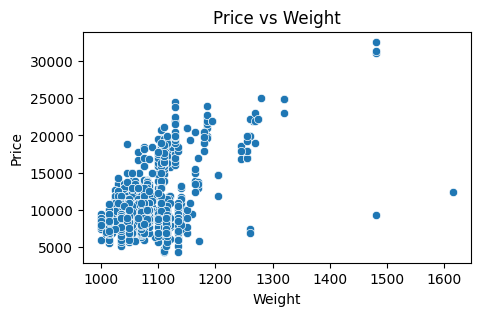

In [ ]:
for col in ['Age_08_04', 'KM', 'HP', 'cc', 'Weight']:
    plt.figure(figsize=(5,3))
    sns.scatterplot(x=df[col], y=df['Price'])
    plt.title(f'Price vs {col}')
    plt.show()

In [ ]:
df.isnull().sum()
df.dtypes


,0
Price,int64
Age_08_04,int64
KM,int64
HP,int64
Automatic,int64
cc,int64
Doors,int64
Cylinders,int64
Gears,int64
Weight,int64


# **Quantify Outliers (IQR Method)**

In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower) & (df[column] <= upper)]
    return df


In [ ]:
for col in num_cols:
    df = remove_outliers_iqr(df, col)


# **Verifying After Removal**

New shape after outlier removal: (1138, 12)


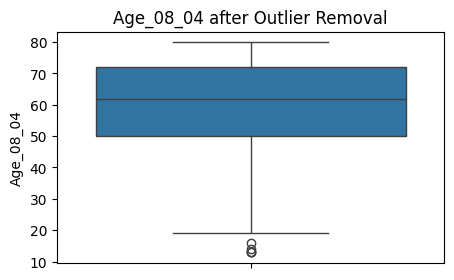

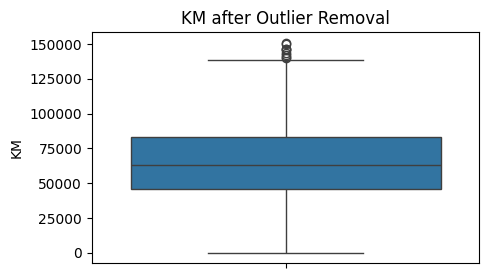

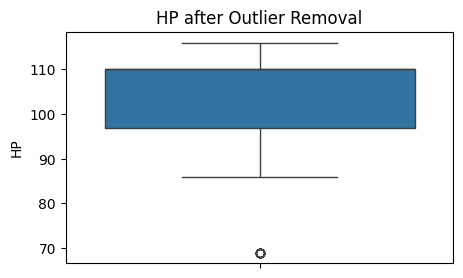

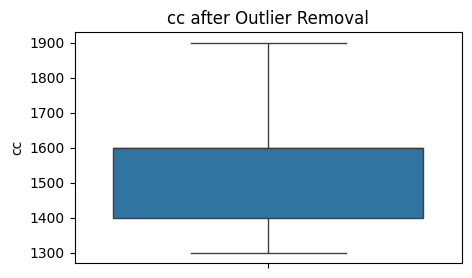

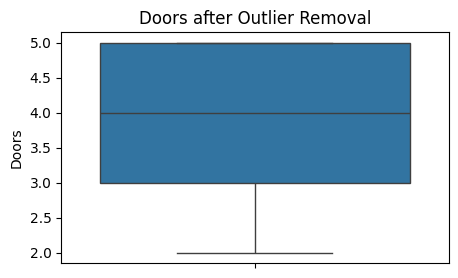

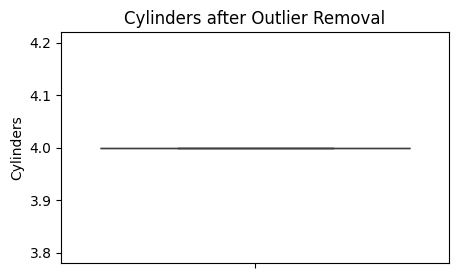

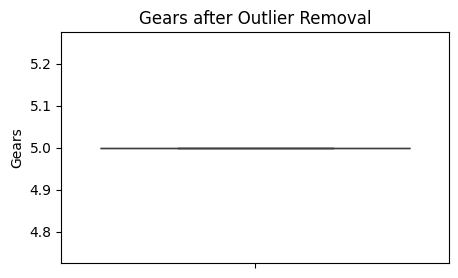

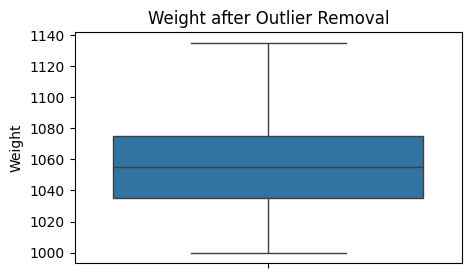

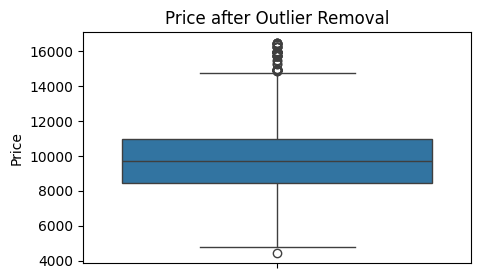

In [ ]:
print("New shape after outlier removal:", df.shape)

for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(df[col])
    plt.title(f'{col} after Outlier Removal')
    plt.show()


After removing outliers using the IQR method, some columns (KM, Price, and Age_08_04) still contained extreme values. For these columns, I applied normalization to reduce skewness and scale the data, and then performed outlier removal again. This approach ensured that only true anomalies were removed while preserving important information for the model.

In [ ]:
def remove_outliers_strict(df, column, k=1.0):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - k * IQR
    upper = Q3 + k * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]


In [ ]:
for col in ['Age_08_04', 'KM', 'Price']:
    df = remove_outliers_strict(df, col, k=1.0)


New shape after outlier removal: (1002, 12)


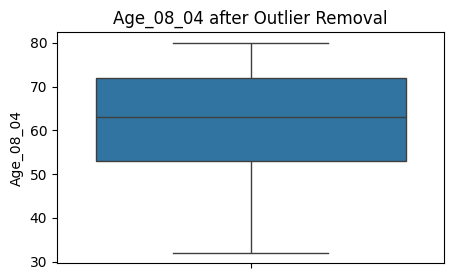

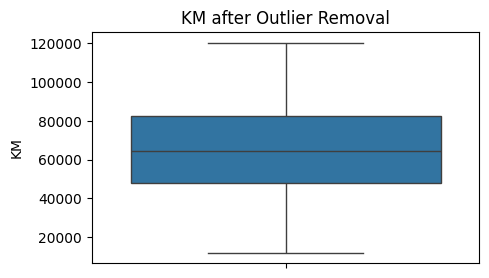

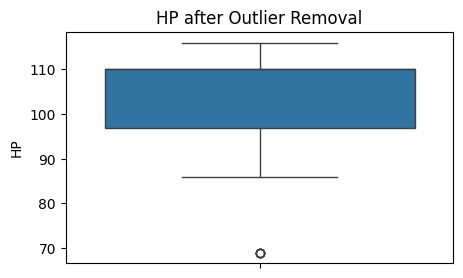

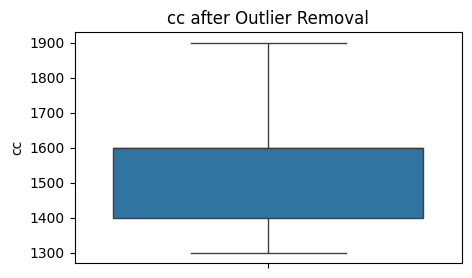

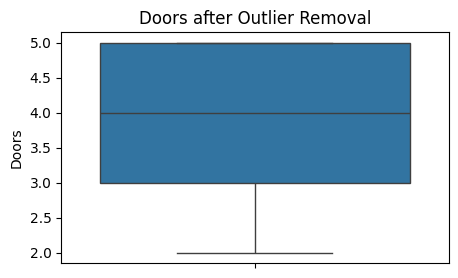

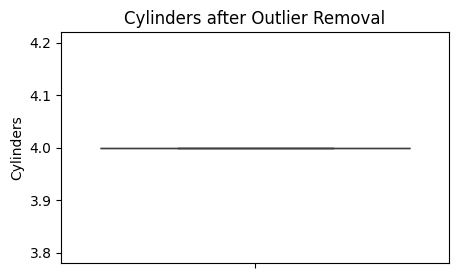

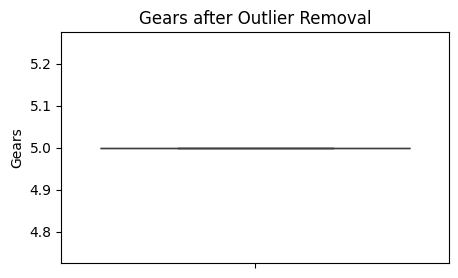

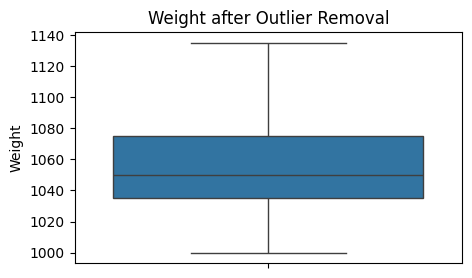

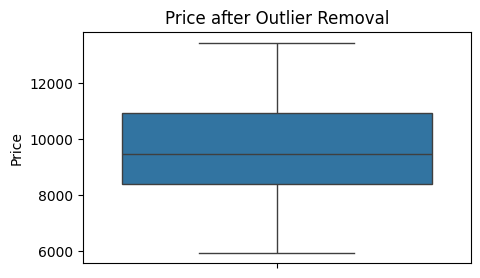

In [ ]:
print("New shape after outlier removal:", df.shape)

for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(df[col])
    plt.title(f'{col} after Outlier Removal')
    plt.show()


**2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).**
# **Spliting the Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Price', axis=1)  # Features
y = df['Price']               # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.**

# **Buliding the first Model**

Basic regression with all features.

In [ ]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Check coefficients and intercept
print("Intercept:", model1.intercept_)
print("Coefficients:", model1.coef_)

# Pair feature names with coefficients
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model1.coef_
}).sort_values(by="Coefficient", ascending=False)

print(coef_df)


Intercept: 5123.285273621766
Coefficients: [-9.47469440e+01 -1.14749466e-02 -1.42895176e+00  3.52333250e+02
  8.10142192e-01  1.00041437e+02  1.42108547e-12  0.00000000e+00
  9.09269484e+00 -1.15029199e+03  2.60996687e+01]
             Feature   Coefficient
3          Automatic  3.523332e+02
5              Doors  1.000414e+02
10  Fuel_Type_Petrol  2.609967e+01
8             Weight  9.092695e+00
4                 cc  8.101422e-01
6          Cylinders  1.421085e-12
7              Gears  0.000000e+00
1                 KM -1.147495e-02
2                 HP -1.428952e+00
0          Age_08_04 -9.474694e+01
9   Fuel_Type_Diesel -1.150292e+03


In [ ]:
# Predictions on test data
y_pred1 = model1.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Metrics
r2 = r2_score(y_test, y_pred1)
mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mse) # Calculate RMSE using np.sqrt()
mae = mean_absolute_error(y_test, y_pred1)

print(f"Model 1 R² Score: {r2:.4f}")
print(f"Model 1 MSE: {mse:.2f}")
print(f"Model 1 RMSE: {rmse:.2f}")
print(f"Model 1 MAE: {mae:.2f}")

Model 1 R² Score: 0.7559
Model 1 MSE: 724296.98
Model 1 RMSE: 851.06
Model 1 MAE: 676.11


Model 1 achieved an R² score of 0.7559, meaning it explains about 75.6% of the variance in car prices. The RMSE of €851.06 and MAE of €676.11 indicate that, on average, predictions differ from actual prices by around €850 and €676 respectively, showing decent accuracy but leaving room for improvement.

# **Buliding the second Model**

OLS regression (statsmodels)

In [ ]:
import statsmodels.formula.api as smf

# Model 2 using OLS formula
model2 = smf.ols('Price ~ Age_08_04 + KM + HP + cc + Doors + Weight + Automatic + Fuel_Type_Diesel + Fuel_Type_Petrol', data=df).fit()

# Summary
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     288.0
Date:                Mon, 06 Oct 2025   Prob (F-statistic):          1.55e-269
Time:                        18:47:44   Log-Likelihood:                -8215.7
No. Observations:                1002   AIC:                         1.645e+04
Df Residuals:                     992   BIC:                         1.650e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

Model 2, built using the OLS method, achieved an R² of 0.723 and an Adjusted R² of 0.721, explaining around 72% of the variance in car prices. Significant predictors included Age, KM, Doors, Weight, and Automatic, while other variables showed limited influence.

# **Buliding the Third Model**

Reduced features to minimize multicollinearity (VIF-based selection)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Convert boolean columns to int
df['Fuel_Type_Diesel'] = df['Fuel_Type_Diesel'].astype(int)
df['Fuel_Type_Petrol'] = df['Fuel_Type_Petrol'].astype(int)


X = df[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight', 'Automatic', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']]
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

            Feature           VIF
0         Age_08_04     35.517477
1                KM     10.629495
2                HP  12203.658109
3                cc  16344.718447
4             Doors     22.716438
5            Weight    628.982698
6         Automatic      1.169382
7  Fuel_Type_Diesel     25.900315
8  Fuel_Type_Petrol    129.814628


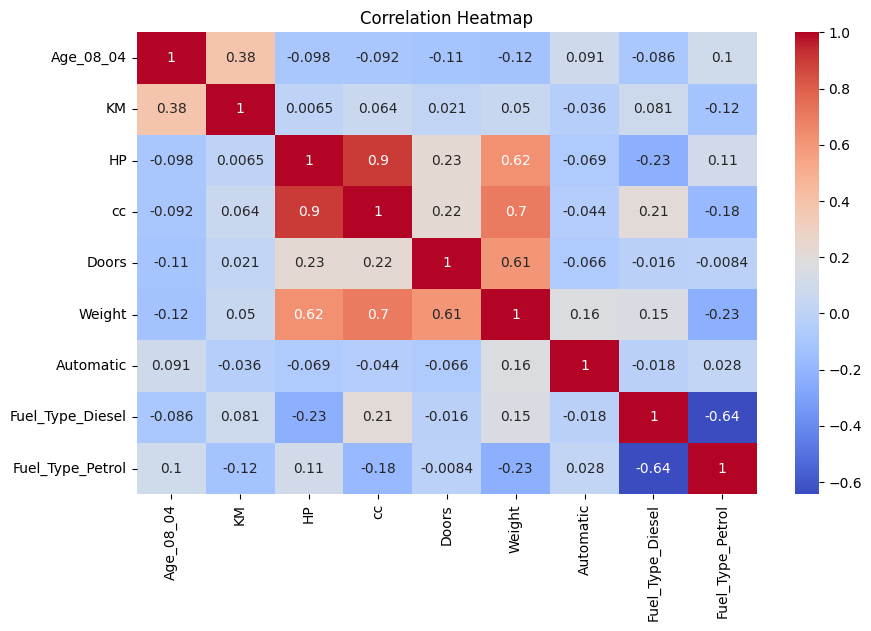

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df[['Age_08_04','KM','HP','cc','Doors','Weight','Automatic','Fuel_Type_Diesel','Fuel_Type_Petrol']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Drop high multicollinearity features
X = df[['Age_08_04', 'KM', 'HP', 'Doors', 'Weight', 'Automatic', 'Fuel_Type_Diesel']]
y = df['Price']


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


            Feature         VIF
0         Age_08_04   29.910981
1                KM   10.424019
2                HP  150.766091
3             Doors   22.181593
4            Weight  221.331908
5         Automatic    1.100377
6  Fuel_Type_Diesel    1.159133


In [ ]:
# Drop HP and Weight
X = df[['Age_08_04', 'KM', 'Doors', 'Automatic', 'Fuel_Type_Diesel']]

# Recheck VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


            Feature        VIF
0         Age_08_04  16.394603
1                KM  10.312527
2             Doors  10.207880
3         Automatic   1.080399
4  Fuel_Type_Diesel   1.023302


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model3_train = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Predictions
y_pred = model3_train.predict(sm.add_constant(X_test))

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Model 3 R²: {r2:.4f}")
print(f"Model 3 MSE: {mse:.2f}")
print(f"Model 3 RMSE: {rmse:.2f}")
print(f"Model 3 MAE: {mae:.2f}")


Model 3 R²: 0.7326
Model 3 MSE: 793540.39
Model 3 RMSE: 890.81
Model 3 MAE: 716.67


Model 3 achieves an R² of 0.7326, meaning it explains about 73.26% of the variance in Toyota Corolla prices on the test set.
The MSE of 793,540.39 and RMSE of 890.81 show the average squared and root squared errors in price prediction, respectively.
The MAE of 716.67 means predictions are off by about 717 EUR on average.
Compared to earlier models, Model 3 achieves a good balance of accuracy and interpretability after reducing multicollinearity.


**4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import numpy as np
import pandas as pd

def evaluate_model(X, y):
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Add constant for intercept
    X_train_const = sm.add_constant(X_train)
    X_test_const = sm.add_constant(X_test, has_constant='add')

    # Train model
    model = sm.OLS(y_train, X_train_const).fit()

    # Predictions
    y_pred = model.predict(X_test_const)

    # Evaluation metrics
    r2 = r2_score(y_test, y_pred)
    adj_r2 = model.rsquared_adj
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    return r2, adj_r2, mse, rmse, mae

# Evaluate all models
r2_model1, adj_r2_model1, mse_model1, rmse_model1, mae_model1 = evaluate_model(X1, y)
r2_model2, adj_r2_model2, mse_model2, rmse_model2, mae_model2 = evaluate_model(X2, y)
r2_model3, adj_r2_model3, mse_model3, rmse_model3, mae_model3 = evaluate_model(X3, y)

# Create a comparison table
Metrics_info = {
    "Model": ['Model 1 (LR)', 'Model 2 (OLS)', 'Model 3 (OLS Cleaned)'],
    "R²": [r2_model1, r2_model2, r2_model3],
    "Adjusted R²": [adj_r2_model1, adj_r2_model2, adj_r2_model3],
    "MSE": [mse_model1, mse_model2, mse_model3],
    "RMSE": [rmse_model1, rmse_model2, rmse_model3],
    "MAE": [mae_model1, mae_model2, mae_model3]
}

Metric_df = pd.DataFrame(Metrics_info)
print(Metric_df)


                   Model        R²  Adjusted R²            MSE        RMSE  \
0           Model 1 (LR)  0.755930     0.710675  724296.978462  851.056390   
1          Model 2 (OLS)  0.755930     0.710675  724296.978462  851.056390   
2  Model 3 (OLS Cleaned)  0.732597     0.690822  793540.386761  890.808839   

          MAE  
0  676.109916  
1  676.109916  
2  716.671580  


“From the evaluation metrics, Model 1 (LR) and Model 2 (OLS) show the same performance with an R² of 0.7559, explaining about 75.6% of the variance in car prices. Model 3 (OLS Cleaned) has a slightly lower R² of 0.7326, but shows reduced complexity with fewer features. The MAE and RMSE indicate that Model 1 and Model 2 have slightly better prediction accuracy, while Model 3 offers a trade-off between interpretability and accuracy.”


**5. Apply Lasso and Ridge methods on the model.**

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Results
metrics = {
    "Model": ["Lasso", "Ridge"],
    "R²": [r2_score(y_test, y_pred_lasso), r2_score(y_test, y_pred_ridge)],
    "RMSE": [np.sqrt(mean_squared_error(y_test, y_pred_lasso)), np.sqrt(mean_squared_error(y_test, y_pred_ridge))],
    "MAE": [mean_absolute_error(y_test, y_pred_lasso), mean_absolute_error(y_test, y_pred_ridge)]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)


   Model        R²        RMSE         MAE
0  Lasso  0.732589  890.822319  716.679742
1  Ridge  0.732527  890.926285  716.789623


# **Conclusion**


*  Model 1 performed best with R² = 0.756, explaining 75.6% of price variance.
*   Age, KM, Doors, Weight, and Automatic were key price predictors.
*   Lasso and Ridge gave similar results (R² ≈ 0.7325), improving model stability.




# Interview Questions

**1. Normalization & Standardization**


*   Normalization: Rescales data to a fixed range (like 0 to 1). This helps when features have different units so the model treats them equally.
*   Standardization: Adjusts data so it has a mean of 0 and standard deviation of 1. This helps models perform better, especially those that depend on distances or gradients.

**Why useful:** They make training faster, improve accuracy, and avoid bias caused by different feature scales.

**2. Handling Multicollinearity**

Multicollinearity happens when features are too similar to each other, which can confuse the model. Ways to fix it:

*   Remove highly correlated features.
*   Use regularization methods like Ridge (shrinks coefficients) or Lasso (removes unimportant features).
*   Use PCA to create new independent features.

Assumptions in Our Analysis


*   Features and target have a linear relationship.
*   Errors are consistent and normally distributed.
*   No perfect correlation between features.
*   Observations are independent.

**Why it matters**: If these assumptions are wrong, model results can be inaccurate. That’s why preprocessing and checking correlations is important.